# App Reviews Sentiment Analysis 
## (Sentimental Analysis on Socialmedia contents)

In [1]:
#import necessary libraries for data pre-processing
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
#loaded the dataFrame from a CSV file named 'reviews.csv'
df=pd.read_csv('reviews.csv')
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,Sentiment_Score,Sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo,-4.0,Negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo,2.0,Positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo,-10.0,Negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo,4.0,Positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo,4.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,Excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner,3.0,Positive
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,I love it. Easy to use. Make my life organize....,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner,13.0,Positive
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,I love how I could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner,6.0,Positive
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,Exactly what I needed!!!,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner,0.0,Neutral


In [3]:
#handles missing values in the 'content' column
df.dropna(subset=['content'], inplace=True)

# 1. Lower Case

In [4]:
#convert the 'content' column to lower case
df['content'] = df['content'].str.lower() 

# 2. Remove Links

In [5]:
#to remove URL links using regular expressions
def remove_links(text):
    return re.sub(r'http\S+', '', text)

#apply the function to 'content' column
df['content'] = df['content'].apply(remove_links)

# 3. Remove Next Lines(\n)

In [6]:
#to remove newline characters from the 'content' column
df['content'] = df['content'].str.replace('\n', '') 

# 4. Words Containing Numbers

In [7]:
#to remove words containing digits from the 'content' column using apply() method and lambda function
df['content'] = df['content'].apply(lambda x: ' '.join(word for word in str(x).split() if not re.match('.*\d.*', str(word))))


# 5. Extra Spaces

In [8]:
#to remove extra spaces from the 'content' column using resub() and lambda function
df['content'] = df['content'].apply(lambda x: re.sub(r'\s+', ' ', x)) 

# 6. Special Characters

In [9]:
#to remove special characters using regular expression
df['content'] = df['content'].str.replace(r'[^a-z\s]', '', regex=True)


# 7. Removal Of Stop Words

In [10]:
nltk.download('stopwords')

#stopwords for English language
stop_words = set(stopwords.words('english'))

#function to remove stop words from text
def remove_stopwords(text):
    #tokenize the text into words
    words = text.split()
    #to remove stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    #to join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)
    return filtered_text

#apply the function to the 'content' column 
df['content'] = df['content'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\Moulya
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 8. Stemming

In [11]:
#importing the PorterStemmer class from nltk
from nltk.stem import PorterStemmer

#initializing porter stemmer
porter_stemmer = PorterStemmer()

#to apply stemming to a given text
def apply_stemming(text):
    words = text.split()  #tokenize the text into words
    stemmed_words = [porter_stemmer.stem(word) for word in words]  #apply stemming to each word
    stemmed_text = ' '.join(stemmed_words)  #join the stemmed words back into a sentence
    return stemmed_text
    
#applying function to the 'content' column 
df['content'] = df['content'].apply(apply_stemming)

# 9. Lematization

In [12]:
#importing the WordNetLemmatizer class from nltk
from nltk.stem import WordNetLemmatizer

#initializing the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    words = text.split()  # Tokenize the text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  #apply lemmatization to each word
    lemmatized_text = ' '.join(lemmatized_words)  #join the lemmatized words back into a sentence
    return lemmatized_text
    
#apply function to the 'content' column 
df['content'] = df['content'].apply(apply_lemmatization)
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,Sentiment_Score,Sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need todolist remind buzz...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo,-4.0,Negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download anydo wide use se...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo,2.0,Positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo,-10.0,Negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo,4.0,Positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl realli nice design fea...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo,4.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excel app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner,3.0,Positive
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,love easi use make life organ love way put pho...,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner,13.0,Positive
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,love could make plan check app almost everyday...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner,6.0,Positive
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactli need,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner,0.0,Neutral


# WordCloud

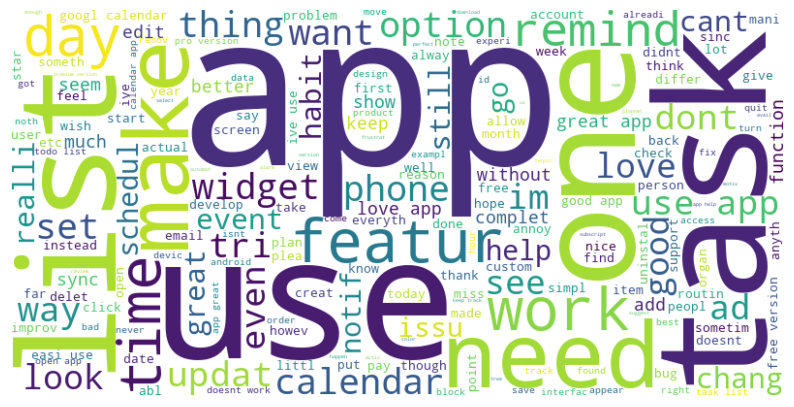

In [14]:
#wordcloud for text summarization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#extract text data from the 'content' column
text_data = ' '.join(df['content'].astype(str))

#create a wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

#display the wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Bar Graph

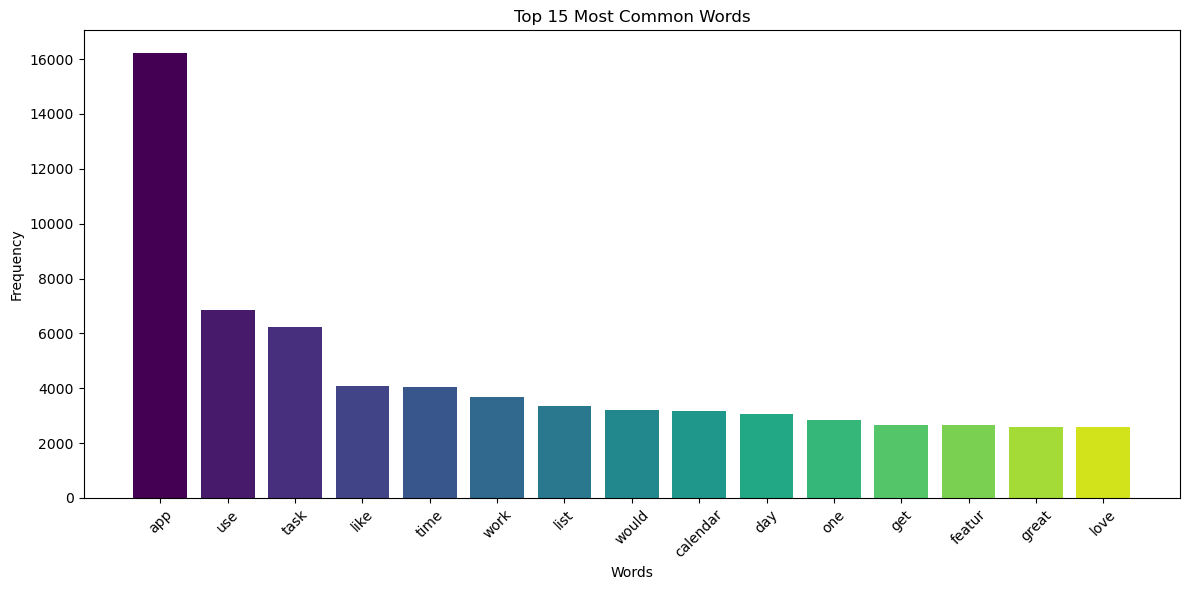

In [15]:
from collections import Counter
import matplotlib.pyplot as plt

#tokenize the text into words and count frequencies
words = ' '.join(df['content']).split()
word_counts = Counter(words)

#top 15 most common words
common_words = word_counts.most_common(15)

#labels and frequencies for the bar graph
labels = [word[0] for word in common_words]
frequencies = [word[1] for word in common_words]

#colors
mixed_colors = [plt.cm.viridis(i/len(labels)) for i in range(len(labels))]

#plot bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, frequencies, color=mixed_colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Words')
plt.xticks(rotation=45)  #x-axis labels
plt.tight_layout()
plt.show()

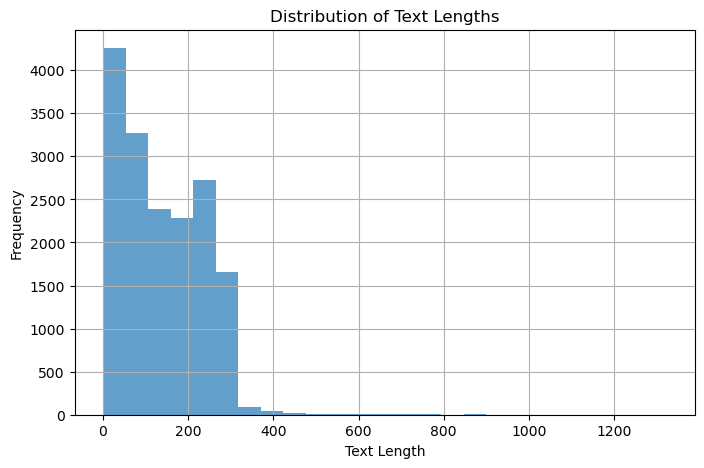

In [16]:
text_lengths = df['content'].dropna().apply(len)

#plot histogram for text lengths
plt.figure(figsize=(8, 5))
plt.hist(text_lengths, bins=25, alpha=0.7)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.grid(True)
plt.show()

In [20]:
#why is this so distributed ? because the maximum length is 1500+. So X-axis is highly dispersed.
max_text_length = df['content'].dropna().apply(len).max()
print("Maximum Text Length:", max_text_length)

Maximum Text Length: 1323


Finally, we would like to see the sentiment distriution in 3 major categories viz positive, neutral & negative within the text data that we have. This would give a precise cumulative idea of sentiment being displayed through content column.

# Sentiment Analysis using AFINN lexicon approach

AFINN is a lexicon-based approach for sentiment analysis that assigns a score to each word in a text based on its sentiment polarity. 
These scores are pre-defined in the AFINN lexicon. 
The sentiment of a text is determined by summing up the scores of all the words and categorizing the overall score as positive, negative, or neutral.


In [18]:
from afinn import Afinn

#initialize AFINN(Affective Norms for English Words) lexicon
afinn = Afinn()

#perform sentiment analysis for each text in the 'content' column
sentiment_scores = []
for text in df['content']:
    #tokenize text into words
    words = text.split()
    # Assign sentiment score for each word and sum up the scores
    sentiment_score = sum(afinn.score(word) for word in words)
    sentiment_scores.append(sentiment_score)

#add sentiment scores to df(dataframe)
df['sentiment_score'] = sentiment_scores

#sentiment scores
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

#print the results
print(df[['content', 'sentiment_score', 'sentiment']])


                                                 content  sentiment_score  \
0      recur task everi day need todolist remind buzz...             -6.0   
1      instead shop around download anydo wide use se...              2.0   
2      everi blue app ask updat acct email everyth ta...             -8.0   
3      terribl updat app use perfect plan certain tas...              4.0   
4      app deceivingli terribl realli nice design fea...              3.0   
...                                                  ...              ...   
16782                                          excel app              0.0   
16783  love easi use make life organ love way put pho...             12.0   
16784  love could make plan check app almost everyday...              6.0   
16785                                       exactli need              0.0   
16786                                               good              3.0   

      sentiment  
0      negative  
1      positive  
2      negative  
3  

# Pie Chart 

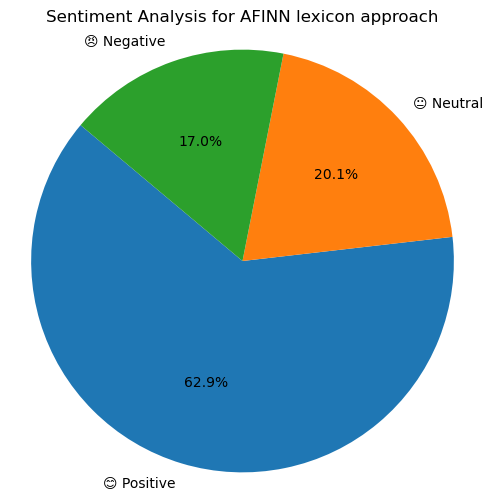

In [21]:
#sentiment analysis for each text 
sentiments = df['content'].apply(lambda text: 'positive' if afinn.score(text) > 0 else ('negative' if afinn.score(text) < 0 else 'neutral'))

#count the occurrences of each sentiment category
sentiment_counts = sentiments.value_counts()

#define emojis for each sentiment category
emojis = {
    'positive': '😊',
    'negative': '😠',
    'neutral': '😐'
}

#plot sentimental analysis using pie chart and emojis symbol
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=[f"{emojis[sentiment]} {sentiment.capitalize()}" for sentiment in sentiment_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Sentiment Analysis for AFINN lexicon approach')
plt.show()

# Sentiment Analysis using VADER lexicon approach

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool that is specifically designed to handle social media text. It analyzes the text by considering punctuation, capitalization, degree modifiers, and other linguistic features to determine the sentiment polarity of the text. VADER provides sentiment scores for each text, including positive, negative, and neutral scores, as well as a compound score that represents the overall sentiment.

In [22]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#perform sentiment analysis for each text in the 'content' column
sentiment_scores = []
sentiments = []
for text in df['content']:
    #get sentiment scores for the text
    sentiment_dict = analyzer.polarity_scores(text)
    sentiment_score = sentiment_dict['compound']
    sentiment_scores.append(sentiment_score)
    
    #determine sentiment based on the compound score
    if sentiment_score >= 0.05:
        sentiment = 'positive'
    elif sentiment_score <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    sentiments.append(sentiment)

#add sentiment scores to DataFrame
df['sentiment_score'] = sentiment_scores
df['sentiment'] = sentiments

#print the results
print(df[['content', 'sentiment_score', 'sentiment']])


                                                 content  sentiment_score  \
0      recur task everi day need todolist remind buzz...          -0.8555   
1      instead shop around download anydo wide use se...           0.1027   
2      everi blue app ask updat acct email everyth ta...          -0.6369   
3      terribl updat app use perfect plan certain tas...           0.4588   
4      app deceivingli terribl realli nice design fea...           0.0346   
...                                                  ...              ...   
16782                                          excel app           0.4588   
16783  love easi use make life organ love way put pho...           0.9477   
16784  love could make plan check app almost everyday...           0.8451   
16785                                       exactli need           0.0000   
16786                                               good           0.4404   

      sentiment  
0      negative  
1      positive  
2      negative  
3  

# Pie Chart

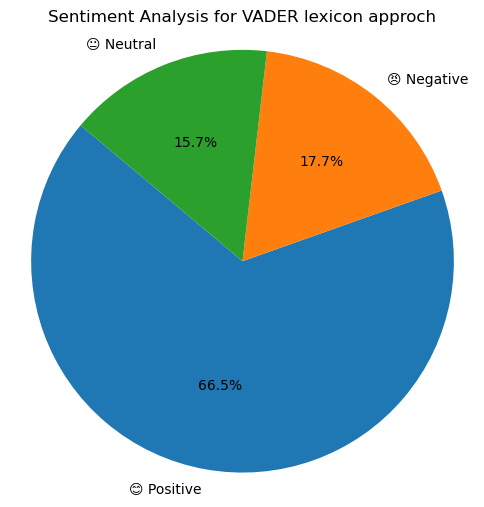

In [24]:
#perform sentiment analysis for each text
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

sentiments = df['content'].apply(get_sentiment)

#count the occurrences of each sentiment category
sentiment_counts = sentiments.value_counts()

#define emojis for each sentiment category
emojis = {
    'positive': '😊',
    'negative': '😠',
    'neutral': '😐'
}

#plot sentiment analysis using pie chart and emoji symbols
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=[f"{emojis[sentiment]} {sentiment.capitalize()}" for sentiment in sentiment_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sentiment Analysis for VADER lexicon approch')
plt.show()


# Sentiment Analysis using Textblob

In [25]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


TextBlob is a Python library that provides simple APIs for common natural language processing (NLP) tasks, including sentiment analysis. It uses a lexicon-based approach similar to AFINN but also incorporates machine learning algorithms for more accurate sentiment analysis. TextBlob's sentiment analysis module provides polarity scores for text, where positive values indicate positive sentiment, negative values indicate negative sentiment, and zero indicates neutral sentiment.


In [26]:
from textblob import TextBlob

#perform sentiment analysis for each text in the 'content' column using TextBlob
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

sentiment_scores = df['content'].apply(get_sentiment_score)

#add sentiment scores to df(dataframe)
df['sentiment_score'] = sentiment_scores

#determine sentiment based on the polarity score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

#print the results
print(df[['content', 'sentiment_score', 'sentiment']])

                                                 content  sentiment_score  \
0      recur task everi day need todolist remind buzz...        -0.125000   
1      instead shop around download anydo wide use se...        -0.116667   
2      everi blue app ask updat acct email everyth ta...         0.027273   
3      terribl updat app use perfect plan certain tas...         0.271429   
4      app deceivingli terribl realli nice design fea...         0.400000   
...                                                  ...              ...   
16782                                          excel app         0.000000   
16783  love easi use make life organ love way put pho...         0.550000   
16784  love could make plan check app almost everyday...         0.266667   
16785                                       exactli need         0.000000   
16786                                               good         0.700000   

      sentiment  
0      negative  
1      negative  
2      positive  
3  

# Pie Chart

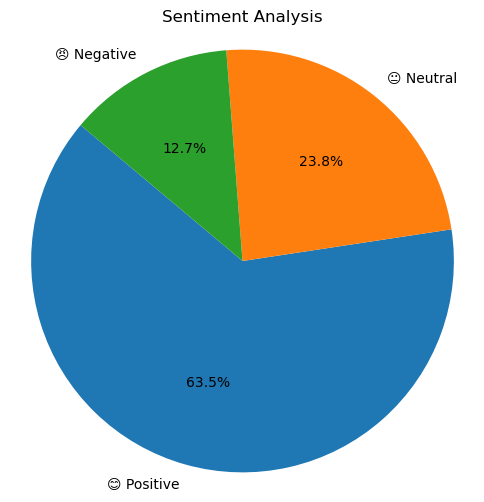

In [27]:
from textblob import TextBlob

#perform sentiment analysis for each text
def get_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

sentiments = df['content'].apply(get_sentiment)

#count the occurrences of each sentiment category
sentiment_counts = sentiments.value_counts()

#define emojis for each sentiment category
emojis = {
    'positive': '😊',
    'negative': '😠',
    'neutral': '😐'
}

#plot sentiment analysis using pie chart and emoji symbols
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=[f"{emojis[sentiment]} {sentiment.capitalize()}" for sentiment in sentiment_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sentiment Analysis')
plt.show()


These tools are commonly used for sentiment analysis tasks in text data processing and can provide valuable insights into the sentiment expressed in textual content.